In [24]:
import numpy as np
import astropy.units as u
from pyirf import simulations,utils 
import matplotlib.pyplot as plt

# Theory

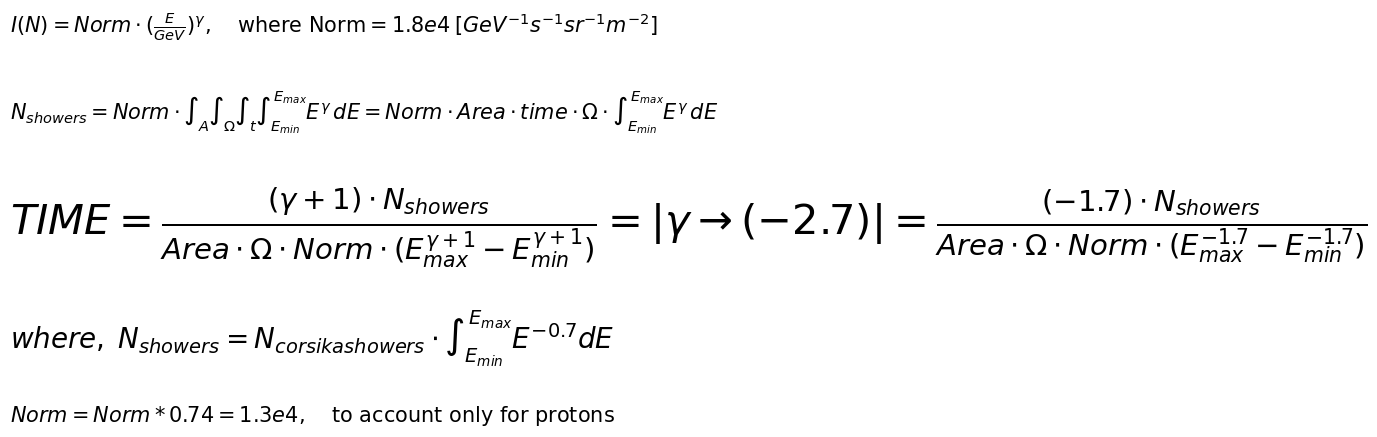

In [31]:
proton_norm_text = r'Norm = Norm * 0.74 = 1.3e4, \: \: \: \: \: \text{to account only for protons}'
intensity_text = r'I(N) = Norm \cdot (\frac{E}{GeV})^{\gamma}, \: \: \: \: \: \text{where Norm} = 1.8e4 \: [GeV^{-1} s^{-1} sr^{-1} m^{-2} ]'
shower_number_text = r'N_{showers} = Norm \cdot \int_A \int_{\Omega} \int_{t} \int_{E_{min}}^{E_{max}} E^{\gamma} \,dE = Norm \cdot Area \cdot time \cdot \Omega \cdot \int_{E_{min}}^{E_{max}} E^{\gamma} \,dE'
time_text = r'TIME = \frac{(\gamma + 1)\cdot N_{showers}}{Area \cdot \Omega \cdot Norm \cdot (E_{max}^{\gamma + 1} - E_{min}^{\gamma + 1})} = | \gamma \rightarrow (-2.7) | = \frac{(-1.7)\cdot N_{showers}}{Area \cdot \Omega \cdot Norm \cdot (E_{max}^{-1.7} - E_{min}^{-1.7})}'
n_showers_text = r'where, \; N_{showers} = N_{corsikashowers} \cdot \int_{E_{min}}^{E_{max}} {E^{-0.7} dE} '
ax = plt.axes([0,0,0.3,0.3]) #left,bottom,width,height
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')

_ = plt.text(0,2.2,'$%s$' %intensity_text,size=15,color="black")

_ = plt.text(0,1.6,'$%s$' %shower_number_text,size=15,color="black")

_ = plt.text(0,0.8,'$%s$' %time_text,size=30,color="black")

_ = plt.text(0,0,'$%s$' %n_showers_text,size=20,color="black")

_ = plt.text(0,-0.5,'$%s$' %proton_norm_text,size=15,color="black")





# Function

In [25]:
def observational_time(simulated_event_info, norm=18000):
    """
    Calculate observation time for simulated events
    
    This function is derived from pyirf.spectral.from_simulation method

    Parameters
    ----------
    Parameters are taken from pyirf.simulations.SimulatedEventsInfo object

    e_min - min energy [GeV]
    e_max - max energy [GeV]
    index - index of simulated power law
    n_showers - number of simulated shower (reused accounted)
    viewcone - viewcone of simulation
    max_impact - diameter of the area for simulation
    e_ref - reference energy value
    norm - normalisation factor from all particles spectrum from PDG (multiplied by 0.74 to normalise only for protons )
    ----------

    Returns
    ----------
    time of observation in seconds

    """

    e_min = simulated_event_info.energy_min.to("GeV")
    e_max = simulated_event_info.energy_max.to("GeV")
    index = simulated_event_info.spectral_index
    n_showers = simulated_event_info.n_showers
    viewcone = simulated_event_info.viewcone.to_value()
    max_impact = simulated_event_info.max_impact.to("m")
    e_ref = 1 * u.GeV
    norm = 0.74 * norm
    
    solid_angle = utils.cone_solid_angle(viewcone*u.deg).to_value()
    A = (np.pi * (max_impact**2))
    
    delta = e_max ** (index + 1) - e_min ** (index + 1)
    nom = (index + 1) * e_ref**index * n_showers
    denom = A * solid_angle * delta * norm

    return (nom / denom).to_value()

# Tests

In [19]:
# MONO Simulation
path = '/fefs/aswg/data/mc/DL0/LSTProd2/TestDataset/Protons/Corsika/node_corsika_theta_10.0_az_248.117_/output'

# integral E^-0.7 from 10 to 103901 GeV
scale_integral = 99.97 

runs = 499
showers = 2e4
CSCAT = 10
mono_shower_number = showers * CSCAT * runs * scale_integral

weighted_proton_number = 114868
weighted_muon_number = 206

simulated_events2 = simulations.SimulatedEventsInfo(n_showers = int(mono_shower_number), 
                                                    energy_min=10*u.GeV, 
                                                    energy_max=103.9*u.TeV, 
                                                    max_impact = 1.511*u.km, 
                                                    spectral_index=-2.7, 
                                                    viewcone=9*u.deg)

time_mono = observational_time(simulated_events2)
print(f"time of observation for 500 runs of mono events = {time_mono} seconds")
print(f"Rate of protons = {weighted_proton_number/time_mono} Hz")
print(f"Rate of muons = {weighted_muon_number/time_mono} Hz")

time of observation for 500 runs of mono events = 115.01903834926273 seconds
Rate of protons = 998.6868404445871 Hz
Rate of muons = 1.7910078449314426 Hz


In [23]:
# 4LST stereo
path = '/fefs/aswg/workspace/MC_common/corsika7.7_simtelarray_20200629/prod5/4LSTs_MAGIC/proton/zenith_20deg/south_pointing/corsika'

# integral E^-0.7 from 10 to 10e5 GeV
scale_integral = 98.75

n_runs = 499
showers = 1e5
CSCAT = 10
stereo_shower_number = showers * CSCAT * runs * scale_integral


weighted_proton_number = 328637
weighted_muon_number = 391

simulated_events3 = simulations.SimulatedEventsInfo(n_showers = int(stereo_shower_number), 
                                                    energy_min=10*u.GeV, 
                                                    energy_max=100*u.TeV, 
                                                    max_impact = 1.500*u.km, 
                                                    spectral_index=-2.7, 
                                                    viewcone=10*u.deg)

time_stereo = observational_time(simulated_events3)
print(f"time of observation for 500 runs of stereo events =  {time_stereo} seconds")
print(f"Rate of protons = {weighted_proton_number/time_stereo} Hz")
print(f"Rate of muons = {weighted_muon_number/time_stereo} Hz")

time of observation for 500 runs of stereo events =  467.1411696481316 seconds
Rate of protons = 703.506822675342 Hz
Rate of muons = 0.8370060816830082 Hz
